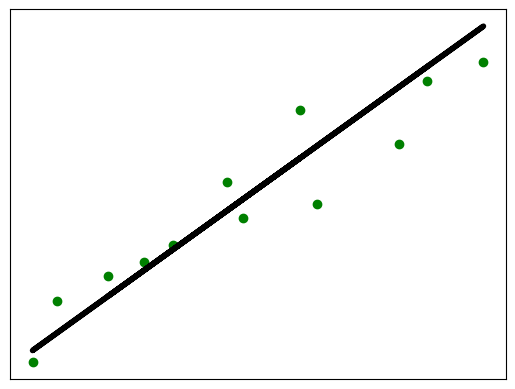

Производительность линейного регрессора:
Средняя абсолютная ошибка = 0.59
Среднеквадратичная ошибка = 0.49
Медианная абсолютная ошибка = 0.51
Объясненная дисперсия = 0.86
Коэффициент детерминации R² = 0.86

Новая средняя абсолютная ошибка = 0.59


In [4]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Входной файл, содержащий данные 
input_file = 'data_singlevar_regr.txt' 

# Загрузка данных 
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Разделение данных на обучающий и тестовый наборы 
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Обучающие данные 
X_train, y_train = X[:num_training], y[:num_training]

# Тестовые данные 
X_test, y_test = X[num_training:], y[num_training:]

# Создание объекта линейного регрессора 
regressor = linear_model.LinearRegression()

# Обучение модели с использованием обучающего набора
regressor.fit(X_train, y_train)

# Прогнозирование результата 
y_test_pred = regressor.predict(X_test)

# Построение графика 
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Вычисление метрических характеристик 
print("Производительность линейного регрессора:")
print("Средняя абсолютная ошибка =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Среднеквадратичная ошибка =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Медианная абсолютная ошибка =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Объясненная дисперсия =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("Коэффициент детерминации R² =", round(sm.r2_score(y_test, y_test_pred), 2))

# Файл для сохранения модели 
output_model_file = 'model.pkl'

# Сохранение модели 
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# Загрузка модели
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Получение прогноза на тестовом наборе данных 
y_test_pred_new = regressor_model.predict(X_test)
print("\nНовая средняя абсолютная ошибка =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))